### Problem statement

Using the Titanic dataset need to predict whether a passenger survivied or not

In [1]:
# Importing the packages and modules
import numpy as np
import pandas as pd
import random as rnd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree, metrics, model_selection, preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from time import time
from operator import itemgetter

F:\Anaconda\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
F:\Anaconda\lib\site-packages\sklearn\cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)
F:\Anaconda\lib\site-packages\sklearn\grid_search.py:42: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. This module will be removed in 0.20.
  DeprecationWarning)


In [2]:
# Reading the dataset
df=pd.read_csv("https://raw.githubusercontent.com/BIgDataGal/Python-for-Data-Science/master/titanic-train.csv")
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
# describition of features in train dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
# checking the features datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


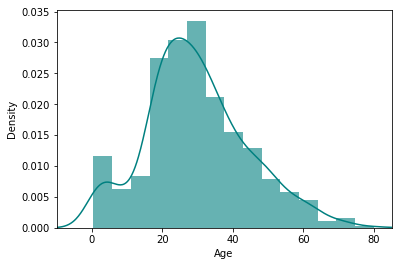

In [5]:
# Stack will overlap the 2 r more graphs
ax=df["Age"].hist(bins=15, density=True, stacked=True, color='teal', alpha=0.6)
df["Age"].plot(kind='density', color='teal')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

In [6]:
# checking the column names
print(df.columns.values)

['PassengerId' 'Survived' 'Pclass' 'Name' 'Sex' 'Age' 'SibSp' 'Parch'
 'Ticket' 'Fare' 'Cabin' 'Embarked']


In [7]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [8]:
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

## Data cleaning

In [9]:
# checking for the null values
df.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [10]:
# filling the null values with median for age and S for Embarked. Cabin is not required so we will remove the column
df["Age"] = df["Age"].fillna(df["Age"].median())
df["Embarked"] = df["Embarked"].fillna("S")

In [11]:
# Dropping the ticket and cabin features
df=df.drop(['Ticket','Cabin'],axis=1)

In [12]:
# checking for the null values
df.isna().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

## Exploring the data

In [13]:
# Checking for the Catergorical variables
categorical=df.dtypes[df.dtypes=='object'].index
print(categorical)

Index(['Name', 'Sex', 'Embarked'], dtype='object')


In [14]:
df.describe(include=['O'])

,Name,Sex,Embarked
count,891,891,891
unique,891,2,3
top,"Stranden, Mr. Juho",male,S
freq,1,577,646


In [15]:
#grouping the data based on Pclass and calculating the mean and checking for survivals
df[['Pclass','Survived']].groupby(['Pclass'],as_index=False).mean().sort_values(by ='Survived',ascending=False)

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


In [16]:
#grouping the data based on sex and calculating the mean and checking for survivals
df[['Sex','Survived']].groupby(['Sex'],as_index=False).mean().sort_values(by ='Survived',ascending=False)

,Sex,Survived
0,female,0.742038
1,male,0.188908


In [17]:
#grouping the data based on SibSp and calculating the mean and checking for survivals
df[['SibSp','Survived']].groupby(['SibSp'],as_index=False).mean().sort_values(by ='Survived',ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [18]:
#grouping the data based on parch and calculating the mean and checking for survivals
df[['Parch','Survived']].groupby(['Parch'],as_index=False).mean().sort_values(by ='Survived',ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


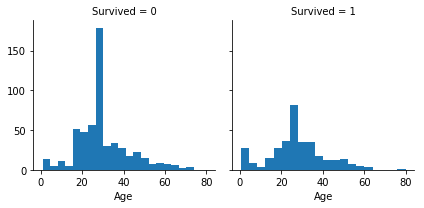

In [19]:
# Plotting the age and survival
g=sns.FacetGrid(df,col='Survived')
g.map(plt.hist,'Age',bins=20)

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


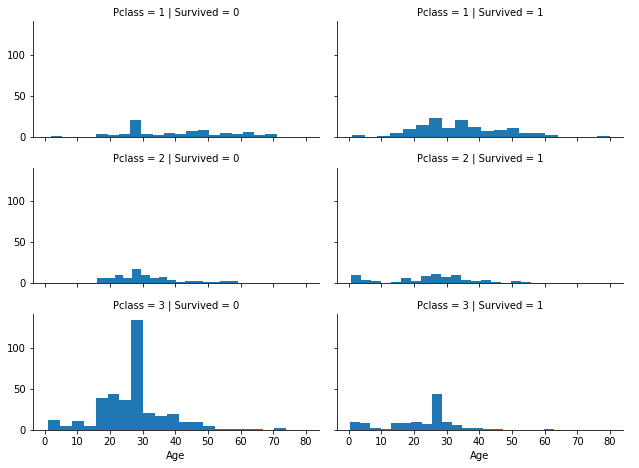

In [20]:
# Plotting the age, Pclass and survival
grid=sns.FacetGrid(df,col='Survived',row='Pclass',size=2.2,aspect=2)
grid.map(plt.hist,'Age',bins=20)
grid.add_legend()

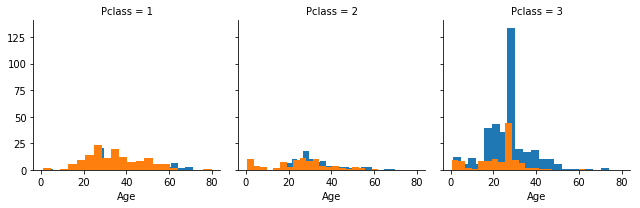

In [21]:
# Plotting the age and Pclass
grid=sns.FacetGrid(df,col='Pclass', hue='Survived')
grid.map(plt.hist,'Age',bins=20)

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the pointplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:720: UserWarning: Using the pointplot function without specifying `hue_order` is likely to produce an incorrect plot.
  warnings.warn(warning)
F:\Anaconda\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


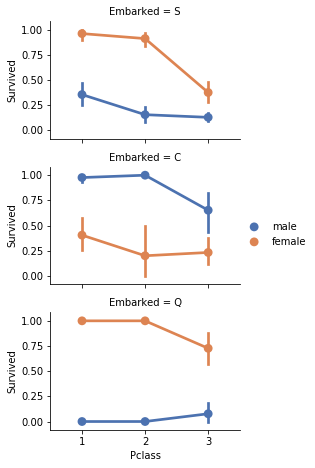

In [22]:
# Plotting the 'Pclass','Survived','Sex' and Embarked
grid=sns.FacetGrid(df,row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.pointplot,'Pclass','Survived','Sex',palette='deep')
grid.add_legend()

F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
F:\Anaconda\lib\site-packages\seaborn\axisgrid.py:715: UserWarning: Using the barplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


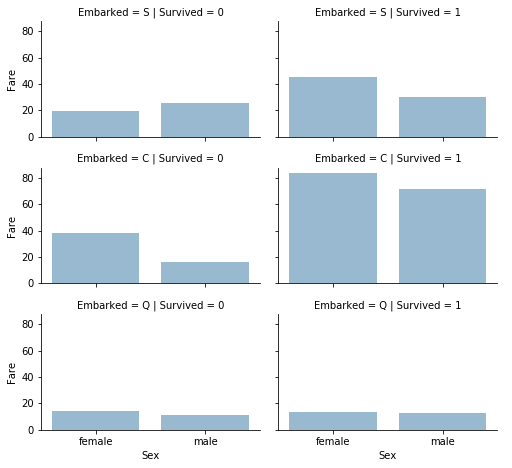

In [23]:
# Plotting the 'Sex','Fare' and Survived features
grid=sns.FacetGrid(df,col='Survived', row='Embarked',size=2.2,aspect=1.6)
grid.map(sns.barplot,'Sex','Fare',alpha=0.5,ci=None)
grid.add_legend()

In [24]:
# Converting catergorical into numerical for sex and Embarked features
df['Sex'],_ = pd.factorize(df['Sex'])
df['Embarked'],_=pd.factorize(df['Embarked'])
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,7.2500,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,71.2833,1
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,7.9250,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,53.1000,0
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,8.0500,0


## Model creation, training and accuracy calculation 

In [25]:
# Selecting the features
X = df[['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Fare']]
y = df['Survived']

In [26]:
# split data randomly into 70% training and 30% test
X_train,X_test,y_train,y_test = model_selection.train_test_split(X,y,test_size=0.3,random_state=0)

In [27]:
# Trainign the model
rf= RandomForestClassifier(criterion='entropy',max_depth=3,random_state=0,n_estimators=500)
rf.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='entropy',
            max_depth=3, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=500, n_jobs=1,
            oob_score=False, random_state=0, verbose=0, warm_start=False)

In [28]:
# Predicting for the test data
y_pred=rf.predict(X_test)

In [29]:
# Accuracy of the model
accuracy=metrics.accuracy_score(y_test,y_pred)
print("Accuracy of the decision tree classifier is: ", accuracy)

Accuracy of the decision tree classifier is:  0.8059701492537313


## Let's check the Random Forest accuracy by chenging the hyperparameters

In [30]:
def GridSearch_BestParam(X, y, clf, param_grid,cv=10):
    grid_search = GridSearchCV(clf,
                              param_grid=param_grid,
                              cv=cv)
    start= time()
    grid_search.fit(X,y)
    top_params=grid_search.grid_scores_
    return top_params


In [36]:
param_grid1 ={"criterion":["gini","entropy"],
              "min_samples_split":[2,3,5],
              "max_depth":[3,5,7],
             "n_estimators":[5,10,100,50,1000,500]
             }

In [37]:
top_para = GridSearch_BestParam(X_train,y_train, rf, param_grid1, cv=10)
print (top_para)

[mean: 0.79294, std: 0.04154, params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 5}, mean: 0.80096, std: 0.03311, params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 10}, mean: 0.82504, std: 0.02666, params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 100}, mean: 0.82343, std: 0.03208, params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 50}, mean: 0.82183, std: 0.02255, params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 1000}, mean: 0.82183, std: 0.02255, params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 2, 'n_estimators': 500}, mean: 0.79294, std: 0.04154, params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 5}, mean: 0.80096, std: 0.03311, params: {'criterion': 'gini', 'max_depth': 3, 'min_samples_split': 3, 'n_estimators': 10}, mean: 0.82504, std: 0.02666, params: 

In [38]:
paramCV = top_para[0].parameters
paramCV

{'criterion': 'gini',
 'max_depth': 3,
 'min_samples_split': 2,
 'n_estimators': 5}

In [39]:
#lets remodel our Random forest by changing the hyperparameters as suguested above

rf1 = RandomForestClassifier(criterion='gini' , max_depth=3,n_estimators=5,min_samples_split=2)

In [40]:
fit = rf1.fit(X_train,y_train)
fit.score(X_test,y_test)

0.8022388059701493